In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import seaborn as sns

#### Data

In [34]:
raw_data = pd.read_csv('Heart_Disease_Prediction.csv')

In [35]:
raw_data

,index,Age,Sex,Chest_pain_type,BP,Cholesterol,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_ST,Vessels_Fluro_No,Thallium,Heart Disease,Heart_Disease,Cholestrol_Check
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0,1
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0,1
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence,0,0
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence,0,1
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence,0,1
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence,0,0


In [36]:
data = raw_data

In [37]:
data.drop(columns=['Heart Disease','Cholesterol','index'],axis=1,inplace=True)

In [38]:
data

,Age,Sex,Chest_pain_type,BP,FBS_over_120,EKG_results,Max_HR,Exercise_angina,ST_depression,Slope_ST,Vessels_Fluro_No,Thallium,Heart_Disease,Cholestrol_Check
0,70,1,4,130,0,2,109,0,2.4,2,3,3,1,1
1,67,0,3,115,0,2,160,0,1.6,2,0,7,0,1
2,57,1,2,124,0,0,141,0,0.3,1,0,7,1,1
3,64,1,4,128,0,0,105,1,0.2,2,1,7,0,1
4,74,0,2,120,0,2,121,1,0.2,1,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,1,0,162,0,0.5,1,0,7,0,0
266,44,1,2,120,0,0,173,0,0.0,1,0,7,0,1
267,56,0,2,140,0,2,153,0,1.3,2,0,3,0,1
268,57,1,4,140,0,0,148,0,0.4,2,0,6,0,0


#### Outlier Detection

In [54]:
data.describe()

,Age,Sex,BP,FBS_over_120,Max_HR,Exercise_angina,ST_depression,Heart_Disease,Cholestrol_Check,1,...,1,2,3,0,1,2,3,3,6,7
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,0.148148,149.677778,0.329630,1.05000,0.444444,0.459259,0.074074,...,0.481481,0.451852,0.066667,0.592593,0.214815,0.122222,0.070370,0.562963,0.051852,0.385185
std,9.109067,0.468195,17.861608,0.355906,23.165717,0.470952,1.14521,0.497827,0.499263,0.262378,...,0.500585,0.498601,0.249907,0.492264,0.411456,0.328151,0.256245,0.496941,0.222140,0.487543
min,29.000000,0.000000,94.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,0.000000,153.500000,0.000000,0.80000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,0.000000,166.000000,1.000000,1.60000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,1.000000,202.000000,1.000000,6.20000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
print('BP Inner',(data['BP'].mean()-3*data['BP'].std()))
print('BP Outer',(data['BP'].mean()+3*data['BP'].std()))

BP Inner 77.75961956604186
BP Outer 184.929269322847


In [62]:
print('HR Inner',(data['Max_HR'].mean()-3*data['Max_HR'].std()))
print('HR Outer',(data['Max_HR'].mean()+3*data['Max_HR'].std()))

HR Inner 80.18062745241751
HR Outer 219.17492810313803


In [63]:
print('ST Inner',(data['ST_depression'].mean()-3*data['ST_depression'].std()))
print('ST Outer',(data['ST_depression'].mean()+3*data['ST_depression'].std()))

ST Inner -2.3856295181339924
ST Outer 4.485629518133992


#### Correlation

In [40]:
data['Thallium'].unique()

array([3, 7, 6], dtype=int64)

<AxesSubplot: >

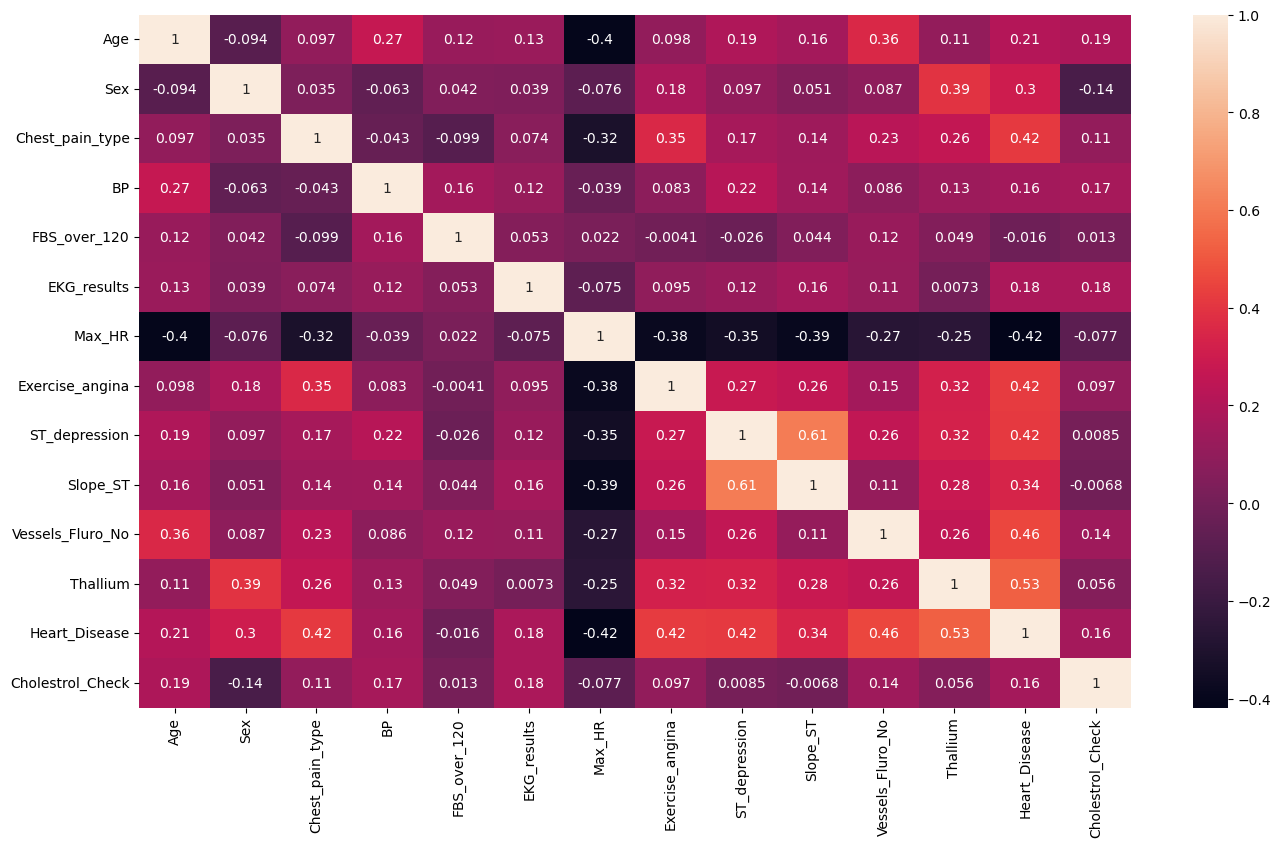

In [41]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot=True)
# The Correlation graph does not show much of a correlation between the variables 

#### Feature Engineering

In [42]:
chest_pain = pd.get_dummies(data['Chest_pain_type'])
data = pd.concat([data,chest_pain],axis=1)
data.drop(columns='Chest_pain_type',inplace=True)

In [44]:
ekg = pd.get_dummies(data['EKG_results'])
data = pd.concat([data,ekg],axis=1)
data.drop(columns='EKG_results',inplace=True)

In [46]:
slope_st = pd.get_dummies(data['Slope_ST'])
data = pd.concat([data,slope_st],axis=1)
data.drop(columns='Slope_ST',inplace=True)

In [48]:
vessels_fluro = pd.get_dummies(data['Vessels_Fluro_No'])
data = pd.concat([data,vessels_fluro],axis=1)
data.drop(columns='Vessels_Fluro_No',inplace=True)

In [50]:
thallium = pd.get_dummies(data['Thallium'])
data = pd.concat([data,thallium],axis=1)
data.drop(columns='Thallium',inplace=True)

##### Splitting the Data

In [52]:
X = data.drop(columns='Heart_Disease')
Y = data['Heart_Disease']

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

##### Scaling the Data

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
scale_x_train = scaler.fit_transform(x_train)
scale_x_test = scaler.fit_transform(x_test)

c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Namdev\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


#### Model

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [72]:
dtc.fit(scale_x_train,y_train)

DecisionTreeClassifier()

In [73]:
pred = dtc.predict(scale_x_test)

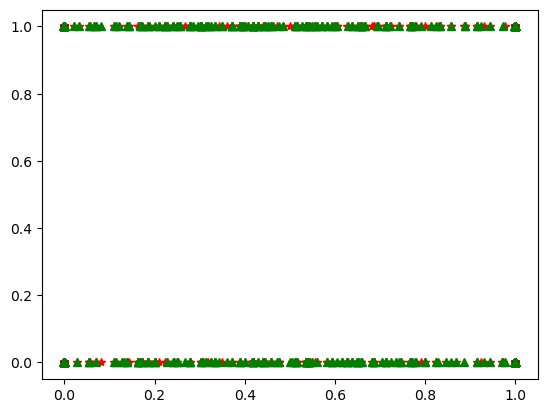

In [74]:
plt.plot(scale_x_test,y_test,"*",color='red')
plt.plot(scale_x_test,pred,'^',color='green')
plt.show()

##### Metrics

In [75]:
from sklearn.metrics import mean_squared_error

loss = mean_squared_error(y_test,pred)
loss

0.2839506172839506

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [78]:
confusion_matrix(y_test,pred)

array([[27, 11],
       [12, 31]], dtype=int64)

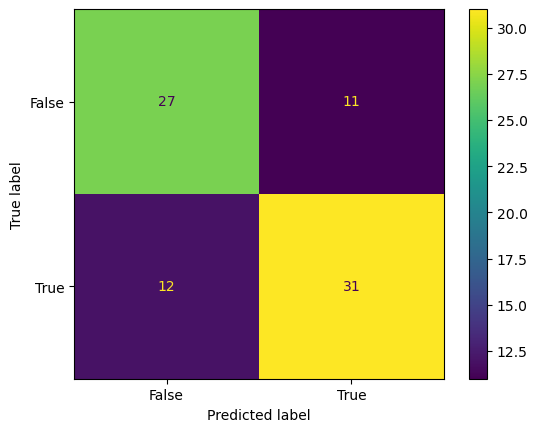

In [80]:
actual = y_test
predicted = pred

confusion_matrix = confusion_matrix(actual, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

0.7380952380952381
0.7209302325581395
